# <h1><center>Fairfax County MS4 Analysis Dashboard</center></h1>

<center>A simple dashboard to evaluate the MS4 Service Area and annual redelineations.</center>

# Table of Contents

* [Get Data](#Get-Data)
* [Spreadsheets](#Spreadsheets)
    * [All metric data](#All-metric-data)
    * [Summmary statistics for all drainage areas](#Summmary-statistics-for-all-drainage-areas)
    * [Summary Statistics by Maintenance Responsibility](#Summary-Statistics-by-Maintenance-Responsibility)
* [Interactive Mapping](#Interactive-Mapping)
* [Static Advanced Figures](#Static-Advanced-Figures)
* [Interactive Figures](#Interactive-Figures)
    * [Histogram of ROW and Easement Data by Maintenance Responsibility](#Histogram-of-ROW-and-Easement-Data-by-Maintenance-Responsibility)
    * [Scatterplot for all Metrics](#Scatterplot-for-All-Metrics)
    * [Histogram for all Metrics](#Histogram-for-all-Metrics)

In [1]:
# Import Packages
import sys, os
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import plotly.graph_objects as go
import plotly.express as px
import qgrid
from plotly.offline import iplot
from scipy import stats
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl, LayerGroup, LegendControl)
from ipywidgets import Text, HTML, widgets, interactive, HBox, VBox
from branca.colormap import linear
%matplotlib inline

## Get Data

In [2]:
DA_Data = pd.read_csv("Final_Metrics.csv")
DA_Data

,STORMNET_ID,Owner,Tot_Acres,Imp_Acres,ROW_Acres,Easement_Acres,Conveyance_Len_FT,STW_Conveyance_Len_FT,row_convey_length_ft,BMP_Per_DA,VDOT_BMP_Count,Treated_Acres,Inlets,Outlets,Buildings,County_Area,County_Area_Imp,Percent_STW_Easement,Percent_ROW,Percent_Treated
0,STMN0742051206,Unknown,62.153739,3.500562,0.124307,22.232392,3829.77,450.09,0.00,0,0,0.000000,3,2,0,0.000000,0.000000,35.77,0.20,0.000000
1,STMN0354516624,FFX,148.212825,36.421364,13.887542,21.061042,18422.03,10259.68,4010.70,6,0,31.178319,135,22,0,0.000000,0.000000,14.21,9.37,21.036182
2,STMN1073502097,Private,123.758855,52.957626,8.675496,16.101027,24254.45,16517.31,3283.67,6,0,37.714782,201,20,1,25.759317,4.884700,13.01,7.01,30.474411
3,STMN1122517951,VPDES,187.368768,15.702610,0.000000,15.926345,1576.60,1356.70,0.00,3,1,15.860000,0,2,0,0.000000,0.000000,8.50,0.00,8.464591
4,STMN0252011350,FFX,138.920437,37.482058,12.711220,14.933947,20027.37,13100.59,2641.58,6,0,10.750000,112,21,1,2.427194,1.307602,10.75,9.15,7.738242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9939,STMN1194503215,Private,1.592395,0.112850,0.000000,0.000000,434.20,0.00,0.00,0,0,0.000000,1,1,0,0.000000,0.000000,0.00,0.00,0.000000
9940,STMN1211510855,Private,69.832986,0.380619,0.000000,0.000000,805.81,0.00,0.00,1,0,0.000000,1,1,0,0.000000,0.000000,0.00,0.00,0.000000
9941,STMN1222510831,Private,48.601710,8.612971,0.000000,0.000000,1492.84,0.00,0.00,0,0,0.000000,10,10,0,0.000000,0.000000,0.00,0.00,0.000000
9942,STMN1222510834,Private,0.079733,0.010856,0.000000,0.000000,61.35,0.00,0.00,0,0,0.000000,0,0,0,0.000000,0.000000,0.00,0.00,0.000000


In [25]:
# Cleanup fields
#DA_Data = DA_Data.drop(['OBJECTID_1','Type_AS', 'Type_BR', 'Type_DP', 'Type_FB', 'Type_FM', 'Type_GR', 'Type_MB', 'Type_OS', 'Type_Other', 'Type_PL', 'Type_PP', 'Type_RF', 'Type_RT', 'Type_SF', 'Type_TF', 'Type_TR', 'Type_UG', 'Type_VF', 'Type_VS', 'Type_WL', 'Type_WS', 'Type_WP', 'Shape_Length', 'Shape_Area', 'Sum_DRAINAGE_AREA'], axis=1)
#DA_Data = DA_Data.rename(columns={"index":"STORMNET_ID","Count_PerDA":"BMP_Per_DA","Sum_TREATED_AREA":"Treated_Acres","Pct_Treated":"Percent_Treated","Area_AC":"Drainage_Area_AC","total_acres":"Area_AC","vdot_bmp_count":"VDOT_BMP_Count","swe_perc":"Percent_STW_Easement","row_perc":"Percent_ROW","total_convey_length_ft":"Conveyance_Len_FT","swe_convey_length_ft":"STW_Conveyance_Len_FT","total_county_acres":"County_Acres","imperv_county_acres":"Impervious_Acres"})
#DA_Data = DA_Data.loc[:,~DA_Data.columns.duplicated()]

View MS4 metric data for all drainage areas. Please note that `maintenance responsibility` has been lumped into five categories: 

(ex. Loudoun County interconnection -> Other Jurisdiction)

- FFX
- VDOT
- Private
- Other Jurisdiction
- VDOT/FFX

In [3]:
my_dict = {'VDOT':'VDOT','Private':'Private','Loudoun County':'Other Jurisdiction','Unknown':'Private','FFX':'FFX','Other Jurisdiction':'Other Jurisdiction', 'VDOt/FFX':'VDOT/FFX','Town of Vienna':'Other Jurisdiction','WMATA':'Other Jurisdiction','VPDES':'Other Jurisdiction','Arlington County':'Other Jurisdiction', 'City of Alexandria':'Other Jurisdiction','FFX Board of Supervisors':'FFX'}
DA_Data = DA_Data.replace({"Owner": my_dict})

## Spreadsheets

### All metric data

In [7]:
qgrid_DA_Data = qgrid.show_grid(DA_Data, show_toolbar=True, grid_options={'forceFitColumns': False})
qgrid_DA_Data

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

### Summmary statistics for all drainage areas

* Note that 50% is the same as the median.

In [8]:
Sum_Stats = DA_Data.loc[:, DA_Data.columns != 'STORMNET_ID'].describe().round(2)
Sum_Grid = qgrid.show_grid(Sum_Stats, show_toolbar=True, grid_options={'forceFitColumns': False})
Sum_Grid                         

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

### Summary Statistics by Maintenance Responsibility

In [9]:
Spreadsheet_df = DA_Data.groupby('Owner').describe().unstack(1).reset_index()
Spreadsheet_df = Spreadsheet_df.rename(columns={"level_0":"Metric","level_1":"Statistic","Owner":"Maint","0":"Value"})
qgrid_widget = qgrid.show_grid(Spreadsheet_df, show_toolbar=True, grid_options={'forceFitColumns': False})
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [10]:
Spreadsheet_df.to_excel("Drainage_Area_Summ_Stats.xlsx")

## Interactive Mapping

In [11]:
Drainage_Areas = gpd.read_file("All_Drainage_Areas.geojson", driver="GeoJSON")
Drainage_Areas = Drainage_Areas.rename(columns={"STORMNET_I":"STORMNET_ID"})
Drainage_Areas = Drainage_Areas.merge(DA_Data, on='STORMNET_ID')

In [12]:
VDOT_DAs = Drainage_Areas[Drainage_Areas.Owner_x == 'VDOT']
VDOT_FFX_DAs = Drainage_Areas[Drainage_Areas.Owner_x == 'VDOT/FFX']
Private_DAs = Drainage_Areas[Drainage_Areas.Owner_x == 'Private']
Other_Jurisdiction_DAs = Drainage_Areas[Drainage_Areas.Owner_x == 'Other_Jurisdiction']
FFX_DAs = Drainage_Areas[Drainage_Areas.Owner_x == 'FFX']

In [14]:
center = (38.8554638, -77.2757340)
m = Map(center=center, zoom=10)

geodata_VDOT = GeoData(geo_dataframe = VDOT_DAs,
                  style={'color': 'black', 'fillColor': '#eb830c', 'opacity':0.03, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                         hover_style={'fillColor': '#b08a3e', 'fillOpacity': 0.8},
                                      name = 'VDOT')
geodata_VDOT_FFX = GeoData(geo_dataframe = VDOT_FFX_DAs,
                  style={'color': 'black', 'fillColor': '#f705df', 'opacity':0.03, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                         hover_style={'fillColor': '#b08a3e', 'fillOpacity': 0.8},
                                      name = 'VDOT/FFX')
geodata_Private = GeoData(geo_dataframe = Private_DAs,
                  style={'color': 'black', 'fillColor': '#053ef7', 'opacity':0.03, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                         hover_style={'fillColor': '#b08a3e', 'fillOpacity': 0.8},
                                      name = 'Private')
geodata_Other_Jurisdiction = GeoData(geo_dataframe = Other_Jurisdiction_DAs,
                  style={'color': 'black', 'fillColor': '#0c0c0d', 'opacity':0.03, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                         hover_style={'fillColor': '#b08a3e', 'fillOpacity': 0.8},
                                      name = 'Other Jurisdiction')
geodata_FFX = GeoData(geo_dataframe = FFX_DAs,
                  style={'color': 'black', 'fillColor': '#05f721', 'opacity':0.03, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                         hover_style={'fillColor': '#b08a3e', 'fillOpacity': 0.8},
                                      name = 'FFX')

m.add_layer(geodata_VDOT)
m.add_layer(geodata_VDOT_FFX)
m.add_layer(geodata_Private)
m.add_layer(geodata_Other_Jurisdiction)
m.add_layer(geodata_FFX)
html = HTML('''Hover Over Drainage Areas''')
html.layout.margin = '0px 20px 20px 20px'
control = WidgetControl(widget=html, position='topright')
m.add_control(control)

def update_html(feature, **kwargs):
    html.value = '''
    <h3><b>{}</b></h3>
    <h4>Maint: {} </h4> 
    <h4>Total Acres: {} acres</h4> 
    <h4>VDOT ROW: {} %</h4>
    '''.format(feature['properties']['STORMNET_ID'],
               feature['properties']['Owner_x'],
               feature['properties']['Tot_Acres'],
               feature['properties']['Percent_ROW'])
geodata_VDOT.on_hover(update_html)
geodata_VDOT_FFX.on_hover(update_html)
geodata_Private.on_hover(update_html)
geodata_Other_Jurisdiction.on_hover(update_html)
geodata_FFX.on_hover(update_html)

search = SearchControl(position="topleft", 
                       url=
                       'https://nominatim.openstreetmap.org/search?format=json&q={s}',
                       zoom=14,
                       property_name='display_name'
                      )
m.add_control(search)
control = FullScreenControl()
m.add_control(control)
m.add_control(LayersControl())
legend = LegendControl({"VDOT":"#eb830c", "VDOT/FFX":"#f705df", "Private":"#053ef7", "Other Jurisdiction":"#0c0c0d", "FFX":"#05f721"}, name="Legend", position="bottomright")
m.add_control(legend)

m

Map(center=[38.8554638, -77.275734], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

## Static Advanced Figures

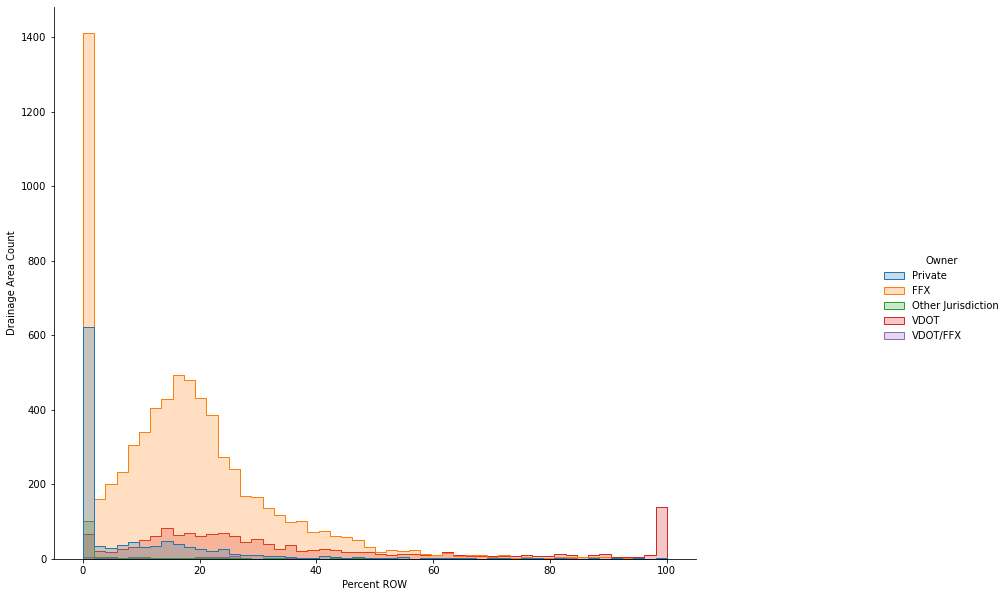

In [15]:
g=sns.displot(DA_Data, x="Percent_ROW", hue="Owner", element="step")
g = (g.set_axis_labels("Percent ROW","Drainage Area Count"))
g.fig.set_size_inches(15,9)

In [16]:
Maint = widgets.Dropdown(
    options=list(DA_Data['Owner'].unique()),
    value='FFX',
    description='Owner:',
)

# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=DA_Data['Percent_ROW'], opacity=0.75, name='Percent_ROW')
trace2 = go.Histogram(x=DA_Data['Percent_STW_Easement'], opacity=0.75, name='Percent_STW_Easement')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='ROW and Easement Data'
                        ),
                        barmode='overlay'
                    ))

In [17]:
def validate():
    if Maint.value in DA_Data['Owner'].unique():
        return True
    else:
        return False

In [18]:
def response(change):
    if validate():
        if Maint.value == 'VDOT':
            temp_df = DA_Data.loc[DA_Data['Owner'] == 'VDOT', ['Percent_ROW', 'Percent_STW_Easement']]
        elif Maint.value == 'Private':
            temp_df = DA_Data.loc[DA_Data['Owner'] == 'Private', ['Percent_ROW', 'Percent_STW_Easement']]
        elif Maint.value == 'Other Jurisdiction':
            temp_df = DA_Data.loc[DA_Data['Owner'] == 'Other Jurisdiction', ['Percent_ROW', 'Percent_STW_Easement']]
        elif Maint.value == 'FFX':
            temp_df = DA_Data.loc[DA_Data['Owner'] == 'FFX', ['Percent_ROW', 'Percent_STW_Easement']]
        else:
            temp_df = DA_Data.loc[DA_Data['Owner'] == 'VDOT/FFX', ['Percent_ROW', 'Percent_STW_Easement']]
        x1 = temp_df['Percent_ROW']
        x2 = temp_df['Percent_STW_Easement']
        with g.batch_update():
            g.data[0].x = x1
            g.data[1].x = x2
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Percent'
            g.layout.yaxis.title = 'Number of Drainage Areas'

Maint.observe(response, names="value")

## Interactive Figures

### Histogram of ROW and Easement Data by Maintenance Responsibility

In [19]:
widgets.VBox([Maint, g])

### Scatterplot for all Metrics

In [20]:
# Map new column to dataframe to add colors by owner
col_dict = {'VDOT':'rgb(255,128,0)', 'VDOT/FFX':'rgb(255,0,255)', 'Private':'rgb(0,0,255)', 'Other Jurisdiction':'rgb(32,32,32)', 'FFX':'rgb(0,204,0)'}
cols = DA_Data['Owner'].map(col_dict)

f = go.FigureWidget(go.Scatter(y = DA_Data['Percent_ROW'],
                                x = DA_Data['Percent_ROW'],
                                mode = 'markers',
                               marker=dict(size=8, color=cols),
                              text=DA_Data['Owner']))
scatter = f.data[0]
N = len(DA_Data)
scatter.x = scatter.x + np.random.rand(N)/10 *(DA_Data['Percent_ROW'].max() - DA_Data['Percent_ROW'].min())
scatter.y = scatter.y + np.random.rand(N)/10 *(DA_Data['Percent_ROW'].max() - DA_Data['Percent_ROW'].min())
scatter.marker.opacity = 0.8

def update_axes(xaxis, yaxis):
    scatter = f.data[0]
    scatter.x = DA_Data[xaxis]
    scatter.y = DA_Data[yaxis]
    with f.batch_update():
        f.layout.xaxis.title = xaxis
        f.layout.yaxis.title = yaxis
        scatter.x = scatter.x + np.random.rand(N)/10 *(DA_Data[xaxis].max() - DA_Data[xaxis].min())
        scatter.y = scatter.y + np.random.rand(N)/10 *(DA_Data[yaxis].max() - DA_Data[yaxis].min())

axis_dropdowns = interactive(update_axes, yaxis = DA_Data.select_dtypes('int64').columns | DA_Data.select_dtypes('float64').columns, xaxis = DA_Data.select_dtypes('int64').columns | DA_Data.select_dtypes('float64').columns)


# Put everything together
VBox((HBox(axis_dropdowns.children),f))


### Histogram for all Metrics

In [22]:
VDOT_Data = DA_Data.loc[DA_Data['Owner'] == 'VDOT']
VDOT_FFX_Data = DA_Data.loc[DA_Data['Owner'] == 'VDOT/FFX']
Private_Data = DA_Data.loc[DA_Data['Owner'] == 'Private']
Other_Jurisdiction_Data = DA_Data.loc[DA_Data['Owner'] == 'Other Jurisdiction']
FFX_Data = DA_Data.loc[DA_Data['Owner'] == 'FFX']

In [23]:
# Histogram Metrics
my_list = list(DA_Data.columns.values.tolist())
newlist = my_list[2:]


Metric = widgets.Dropdown(
    options=newlist,
    value='Easement_Acres',
    description='Metric:',
)

# Assign an empty figure widget with five traces
trace1 = go.Histogram(x=VDOT_Data['Easement_Acres'], opacity=0.75, name='VDOT')
trace2 = go.Histogram(x=VDOT_FFX_Data['Easement_Acres'], opacity=0.75, name='VDOT/FFX')
trace3 = go.Histogram(x=Private_Data['Easement_Acres'], opacity=0.75, name='Private')
trace4 = go.Histogram(x=Other_Jurisdiction_Data['Easement_Acres'], opacity=0.75, name='Other Jurisdiction')
trace5 = go.Histogram(x=FFX_Data['Easement_Acres'], opacity=0.75, name='FFX')
h = go.FigureWidget(data=[trace1,trace2,trace3,trace4,trace5],
                    layout=go.Layout(
                        title=dict(
                            text='Metric Histogram'
                        ),
                        barmode='overlay'
                    ))
def response(change):
    if Metric.value == 'Easement_Acres':
        VDOT_df = VDOT_Data['Easement_Acres']
        VDOT_FFX_df = VDOT_FFX_Data['Easement_Acres']
        Private_df = Private_Data['Easement_Acres']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['Easement_Acres']
        FFX_df = FFX_Data['Easement_Acres']
    elif Metric.value == 'Percent_Treated':
        VDOT_df = VDOT_Data['Percent_Treated']
        VDOT_FFX_df = VDOT_FFX_Data['Percent_Treated']
        Private_df = Private_Data['Percent_Treated']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['Percent_Treated']
        FFX_df = FFX_Data['Percent_Treated']
    elif Metric.value == 'Tot_Acres':
        VDOT_df = VDOT_Data['Tot_Acres']
        VDOT_FFX_df = VDOT_FFX_Data['Tot_Acres']
        Private_df = Private_Data['Tot_Acres']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['Tot_Acres']
        FFX_df = FFX_Data['Tot_Acres']
    elif Metric.value == 'Imp_Acres':
        VDOT_df = VDOT_Data['Imp_Acres']
        VDOT_FFX_df = VDOT_FFX_Data['Imp_Acres']
        Private_df = Private_Data['Imp_Acres']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['Imp_Acres']
        FFX_df = FFX_Data['Imp_Acres']
    elif Metric.value == 'ROW_Acres':
        VDOT_df = VDOT_Data['ROW_Acres']
        VDOT_FFX_df = VDOT_FFX_Data['ROW_Acres']
        Private_df = Private_Data['ROW_Acres']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['ROW_Acres']
        FFX_df = FFX_Data['ROW_Acres']    
    elif Metric.value == 'Percent_STW_Easement':
        VDOT_df = VDOT_Data['Percent_STW_Easement']
        VDOT_FFX_df = VDOT_FFX_Data['Percent_STW_Easement']
        Private_df = Private_Data['Percent_STW_Easement']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['Percent_STW_Easement']
        FFX_df = FFX_Data['Percent_STW_Easement']      
    elif Metric.value == 'Percent_ROW':
        VDOT_df = VDOT_Data['Percent_ROW']
        VDOT_FFX_df = VDOT_FFX_Data['Percent_ROW']
        Private_df = Private_Data['Percent_ROW']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['Percent_ROW']
        FFX_df = FFX_Data['Percent_ROW']   
    elif Metric.value == 'STW_Conveyance_Len_FT':
        VDOT_df = VDOT_Data['STW_Conveyance_Len_FT']
        VDOT_FFX_df = VDOT_FFX_Data['STW_Conveyance_Len_FT']
        Private_df = Private_Data['STW_Conveyance_Len_FT']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['STW_Conveyance_Len_FT']
        FFX_df = FFX_Data['STW_Conveyance_Len_FT']       
    elif Metric.value == 'row_convey_length_ft':
        VDOT_df = VDOT_Data['row_convey_length_ft']
        VDOT_FFX_df = VDOT_FFX_Data['row_convey_length_ft']
        Private_df = Private_Data['row_convey_length_ft']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['row_convey_length_ft']
        FFX_df = FFX_Data['row_convey_length_ft']      
    elif Metric.value == 'Conveyance_Len_FT':
        VDOT_df = VDOT_Data['Conveyance_Len_FT']
        VDOT_FFX_df = VDOT_FFX_Data['Conveyance_Len_FT']
        Private_df = Private_Data['Conveyance_Len_FT']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['Conveyance_Len_FT']
        FFX_df = FFX_Data['Conveyance_Len_FT']
    elif Metric.value == 'BMP_Per_DA':
        VDOT_df = VDOT_Data['BMP_Per_DA']
        VDOT_FFX_df = VDOT_FFX_Data['BMP_Per_DA']
        Private_df = Private_Data['BMP_Per_DA']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['BMP_Per_DA']
        FFX_df = FFX_Data['BMP_Per_DA']
    elif Metric.value == 'VDOT_BMP_Count':
        VDOT_df = VDOT_Data['VDOT_BMP_Count']
        VDOT_FFX_df = VDOT_FFX_Data['VDOT_BMP_Count']
        Private_df = Private_Data['VDOT_BMP_Count']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['VDOT_BMP_Count']
        FFX_df = FFX_Data['VDOT_BMP_Count']
    elif Metric.value == 'Inlets':
        VDOT_df = VDOT_Data['Inlets']
        VDOT_FFX_df = VDOT_FFX_Data['Inlets']
        Private_df = Private_Data['Inlets']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['Inlets']
        FFX_df = FFX_Data['Inlets']
    elif Metric.value == 'Outlets':
        VDOT_df = VDOT_Data['Outlets']
        VDOT_FFX_df = VDOT_FFX_Data['Outlets']
        Private_df = Private_Data['Outlets']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['Outlets']
        FFX_df = FFX_Data['Outlets']
    elif Metric.value == 'Buildings':
        VDOT_df = VDOT_Data['Buildings']
        VDOT_FFX_df = VDOT_FFX_Data['Buildings']
        Private_df = Private_Data['Buildings']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['Buildings']
        FFX_df = FFX_Data['Buildings']
    elif Metric.value == 'County_Area':
        VDOT_df = VDOT_Data['County_Area']
        VDOT_FFX_df = VDOT_FFX_Data['County_Area']
        Private_df = Private_Data['County_Area']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['County_Area']
        FFX_df = FFX_Data['County_Area']
    elif Metric.value == 'County_Area_Imp':
        VDOT_df = VDOT_Data['County_Area_Imp']
        VDOT_FFX_df = VDOT_FFX_Data['County_Area_Imp']
        Private_df = Private_Data['County_Area_Imp']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['County_Area_Imp']
        FFX_df = FFX_Data['County_Area_Imp'] 
    else:
        VDOT_df = VDOT_Data['Treated_Acres']
        VDOT_FFX_df = VDOT_FFX_Data['Treated_Acres']
        Private_df = Private_Data['Treated_Acres']
        Other_Jurisdiction_df = Other_Jurisdiction_Data['Treated_Acres']
        FFX_df = FFX_Data['Treated_Acres']   
    x1 = VDOT_df
    x2 = VDOT_FFX_df
    x3 = Private_df
    x4 = Other_Jurisdiction_df
    x5 = FFX_df
    with h.batch_update():
        h.data[0].x = x1
        h.data[1].x = x2
        h.data[2].x = x3
        h.data[3].x = x4
        h.data[4].x = x5
        h.layout.barmode = 'overlay'
        h.layout.xaxis.title = 'Metric'
        h.layout.yaxis.title = 'Number of Drainage Areas'

Metric.observe(response, names="value")

In [24]:
widgets.VBox([Metric, h])